In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [13]:
df= pd.read_csv("Cairo-Weather.csv")

In [14]:
df


,time,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),temperature_2m_min (°C),temperature_2m_max (°C),apparent_temperature_max (°C),weather_code (wmo code),wind_direction_10m_dominant (°),...,dew_point_2m_mean (°C),relative_humidity_2m_mean (%),visibility_mean (undefined),visibility_max (undefined),visibility_min (undefined),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h)
0,2/1/2009,14.1,0.0,12.0,11.0,7.9,20.6,17.5,0,215,...,0.7,42,NaN,NaN,NaN,17.1,8.8,215,10.8,5.7
1,2/2/2009,14.3,0.0,11.9,11.4,5.8,21.9,19.1,0,74,...,1.1,45,NaN,NaN,NaN,15.1,7.5,74,7.9,1.1
2,2/3/2009,16.1,0.0,21.3,12.3,9.2,24.0,19.5,2,65,...,2.4,43,NaN,NaN,NaN,27.8,15.0,65,17.3,9.0
3,2/4/2009,17.9,0.0,18.3,15.5,10.9,26.8,24.4,3,90,...,4.0,46,NaN,NaN,NaN,18.9,8.8,90,9.7,0.4
4,2/5/2009,18.0,0.0,13.6,14.4,11.4,26.4,22.2,0,222,...,-1.6,31,NaN,NaN,NaN,19.9,10.0,222,11.9,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,1/28/2025,16.9,0.0,14.8,15.0,13.0,21.6,18.6,3,34,...,7.9,59,NaN,NaN,NaN,25.1,9.5,34,13.7,5.3
5841,1/29/2025,17.2,0.0,13.4,15.0,11.7,23.1,20.5,3,26,...,5.9,50,NaN,NaN,NaN,23.1,8.6,26,12.6,5.0
5842,1/30/2025,17.5,0.0,15.9,16.3,11.8,24.0,22.6,3,17,...,9.2,62,NaN,NaN,NaN,21.1,7.3,17,5.0,0.8
5843,1/31/2025,16.9,0.0,13.0,15.2,11.2,22.6,19.5,2,4,...,7.4,58,NaN,NaN,NaN,21.1,7.3,4,7.2,3.1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             5845 non-null   object 
 1   temperature_2m_mean (°C)         5845 non-null   float64
 2   rain_sum (mm)                    5845 non-null   float64
 3   wind_speed_10m_max (km/h)        5845 non-null   float64
 4   apparent_temperature_mean (°C)   5845 non-null   float64
 5   temperature_2m_min (°C)          5845 non-null   float64
 6   temperature_2m_max (°C)          5845 non-null   float64
 7   apparent_temperature_max (°C)    5845 non-null   float64
 8   weather_code (wmo code)          5845 non-null   int64  
 9   wind_direction_10m_dominant (°)  5845 non-null   int64  
 10  wind_gusts_10m_max (km/h)        5845 non-null   float64
 11  shortwave_radiation_sum (MJ/m²)  5845 non-null   float64
 12  daylight_duration (s

In [16]:
df.isnull().sum()

,0
time,0
temperature_2m_mean (°C),0
rain_sum (mm),0
wind_speed_10m_max (km/h),0
apparent_temperature_mean (°C),0
temperature_2m_min (°C),0
temperature_2m_max (°C),0
apparent_temperature_max (°C),0
weather_code (wmo code),0
wind_direction_10m_dominant (°),0


In [17]:
df =df.drop(["visibility_mean (undefined)", "visibility_max (undefined)", "visibility_min (undefined)"], axis=1)
df

,time,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),temperature_2m_min (°C),temperature_2m_max (°C),apparent_temperature_max (°C),weather_code (wmo code),wind_direction_10m_dominant (°),...,et0_fao_evapotranspiration (mm),snowfall_sum (cm),cloud_cover_mean (%),dew_point_2m_mean (°C),relative_humidity_2m_mean (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h)
0,2/1/2009,14.1,0.0,12.0,11.0,7.9,20.6,17.5,0,215,...,3.57,0,0,0.7,42,17.1,8.8,215,10.8,5.7
1,2/2/2009,14.3,0.0,11.9,11.4,5.8,21.9,19.1,0,74,...,3.61,0,0,1.1,45,15.1,7.5,74,7.9,1.1
2,2/3/2009,16.1,0.0,21.3,12.3,9.2,24.0,19.5,2,65,...,4.69,0,3,2.4,43,27.8,15.0,65,17.3,9.0
3,2/4/2009,17.9,0.0,18.3,15.5,10.9,26.8,24.4,3,90,...,3.76,0,32,4.0,46,18.9,8.8,90,9.7,0.4
4,2/5/2009,18.0,0.0,13.6,14.4,11.4,26.4,22.2,0,222,...,4.68,0,0,-1.6,31,19.9,10.0,222,11.9,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,1/28/2025,16.9,0.0,14.8,15.0,13.0,21.6,18.6,3,34,...,3.20,0,47,7.9,59,25.1,9.5,34,13.7,5.3
5841,1/29/2025,17.2,0.0,13.4,15.0,11.7,23.1,20.5,3,26,...,3.45,0,11,5.9,50,23.1,8.6,26,12.6,5.0
5842,1/30/2025,17.5,0.0,15.9,16.3,11.8,24.0,22.6,3,17,...,2.94,0,9,9.2,62,21.1,7.3,17,5.0,0.8
5843,1/31/2025,16.9,0.0,13.0,15.2,11.2,22.6,19.5,2,4,...,3.15,0,9,7.4,58,21.1,7.3,4,7.2,3.1


In [18]:
#type casting
df["time"] = pd.to_datetime(df["time"], format="%m/%d/%Y")
df['sunrise (iso8601)'] = pd.to_datetime(df['sunrise (iso8601)'])
df['sunset (iso8601)'] = pd.to_datetime(df['sunset (iso8601)'])


In [19]:
#Find Identical columns
def identicalcols(df):
    identical_cols = []
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if df[cols[i]].equals(df[cols[j]]):
                identical_cols.append((cols[i], cols[j]))
    return identical_cols

duplicates = identicalcols(df)

if duplicates:
    print("Identical columns:")
    for pair in duplicates:
        print(f"{pair[0]} == {pair[1]}")
else:
    print("No identical columns.")

Identical columns:
rain_sum (mm) == precipitation_sum (mm)
wind_direction_10m_dominant (°) == winddirection_10m_dominant (°)


In [20]:
df = df.drop(columns=['precipitation_sum (mm)', 'winddirection_10m_dominant (°)'])

In [21]:
df

,time,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),temperature_2m_min (°C),temperature_2m_max (°C),apparent_temperature_max (°C),weather_code (wmo code),wind_direction_10m_dominant (°),...,precipitation_hours (h),et0_fao_evapotranspiration (mm),snowfall_sum (cm),cloud_cover_mean (%),dew_point_2m_mean (°C),relative_humidity_2m_mean (%),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h)
0,2009-02-01,14.1,0.0,12.0,11.0,7.9,20.6,17.5,0,215,...,0,3.57,0,0,0.7,42,17.1,8.8,10.8,5.7
1,2009-02-02,14.3,0.0,11.9,11.4,5.8,21.9,19.1,0,74,...,0,3.61,0,0,1.1,45,15.1,7.5,7.9,1.1
2,2009-02-03,16.1,0.0,21.3,12.3,9.2,24.0,19.5,2,65,...,0,4.69,0,3,2.4,43,27.8,15.0,17.3,9.0
3,2009-02-04,17.9,0.0,18.3,15.5,10.9,26.8,24.4,3,90,...,0,3.76,0,32,4.0,46,18.9,8.8,9.7,0.4
4,2009-02-05,18.0,0.0,13.6,14.4,11.4,26.4,22.2,0,222,...,0,4.68,0,0,-1.6,31,19.9,10.0,11.9,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2025-01-28,16.9,0.0,14.8,15.0,13.0,21.6,18.6,3,34,...,0,3.20,0,47,7.9,59,25.1,9.5,13.7,5.3
5841,2025-01-29,17.2,0.0,13.4,15.0,11.7,23.1,20.5,3,26,...,0,3.45,0,11,5.9,50,23.1,8.6,12.6,5.0
5842,2025-01-30,17.5,0.0,15.9,16.3,11.8,24.0,22.6,3,17,...,0,2.94,0,9,9.2,62,21.1,7.3,5.0,0.8
5843,2025-01-31,16.9,0.0,13.0,15.2,11.2,22.6,19.5,2,4,...,0,3.15,0,9,7.4,58,21.1,7.3,7.2,3.1


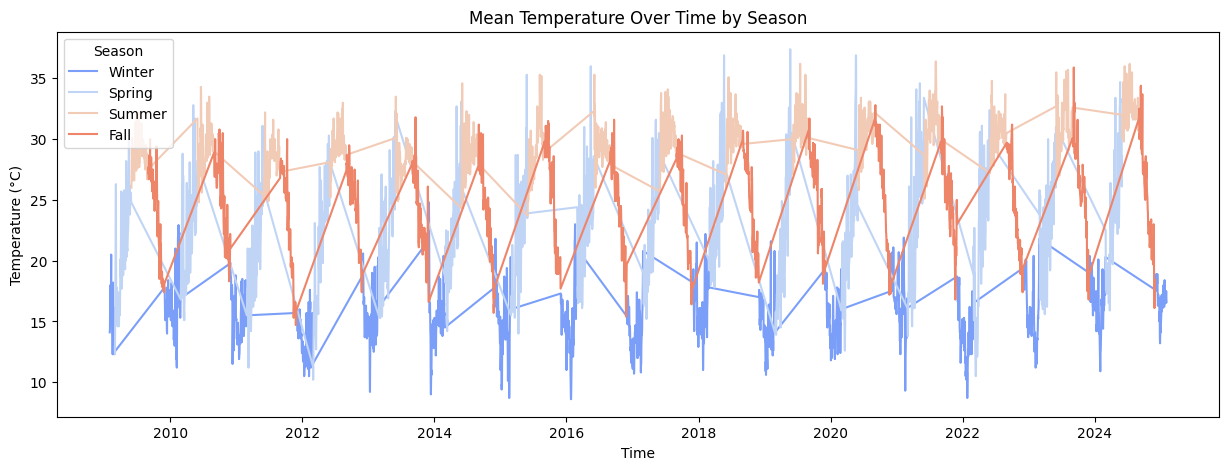

In [22]:
df['time']= pd.to_datetime(df['time'])

def get_season(date):
    month= date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] =df['time'].apply(get_season)
df = df.sort_values(by='time')
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='time', y='temperature_2m_mean (°C)', hue='season', palette='coolwarm')
plt.title("Mean Temperature Over Time by Season")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.legend(title="Season")
plt.show()

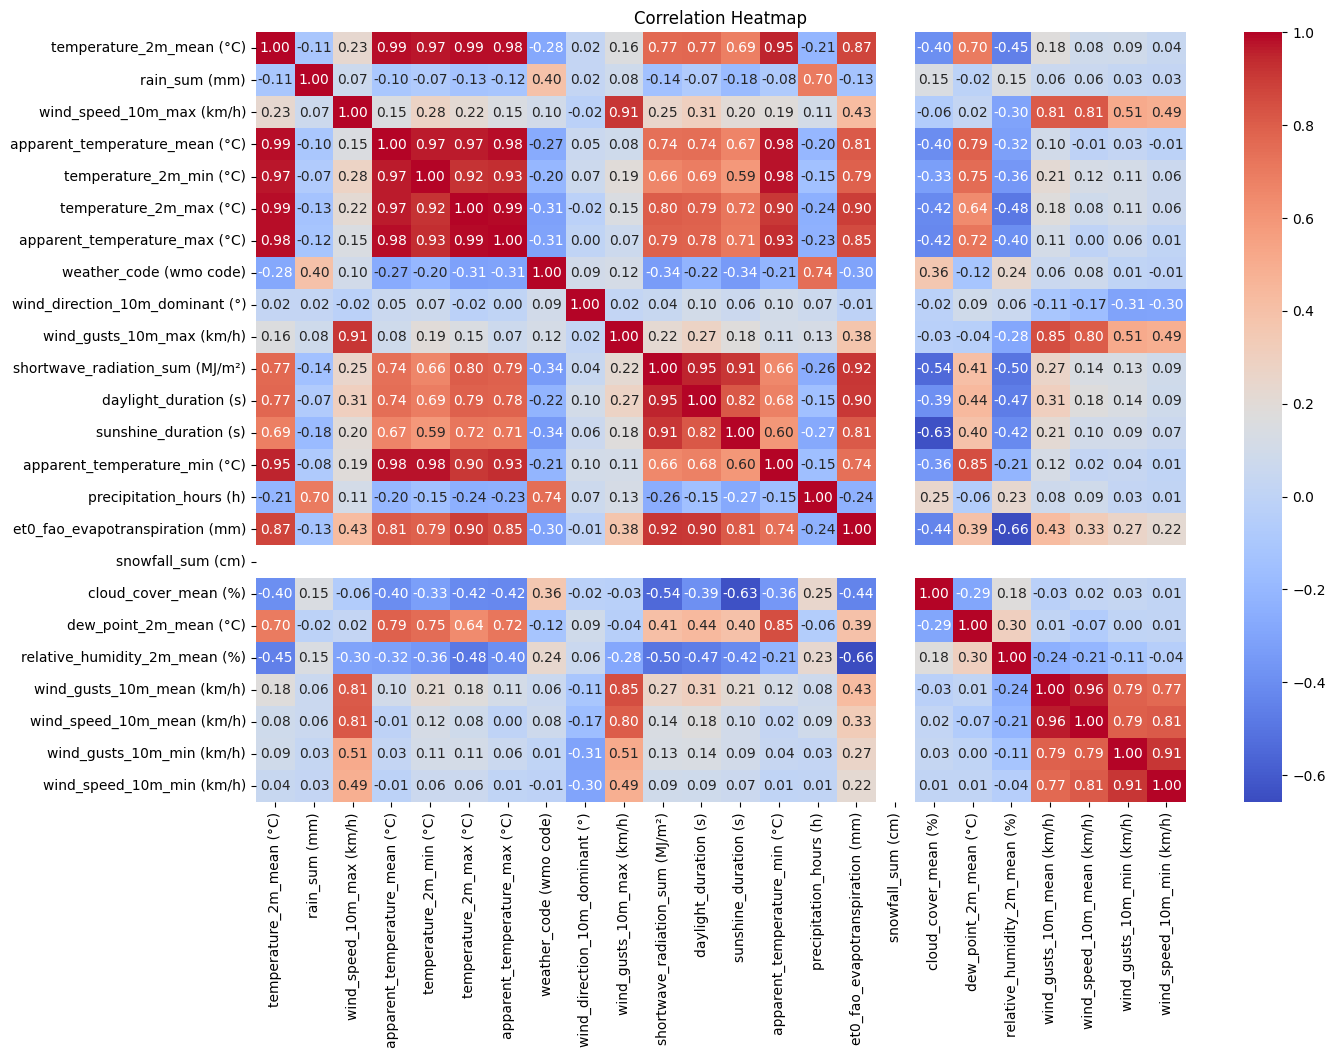

In [23]:
numeric_df = df.select_dtypes(include=['number'])
correlated_data = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlated_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [24]:
corr_matrix = df.corr(numeric_only=True)
target_corr = corr_matrix['temperature_2m_mean (°C)'].drop('temperature_2m_mean (°C)')
top_corr = target_corr[abs(target_corr) >0.5].sort_values(ascending=False)
print(top_corr)


apparent_temperature_mean (°C)     0.986771
temperature_2m_max (°C)            0.985119
apparent_temperature_max (°C)      0.983873
temperature_2m_min (°C)            0.968546
apparent_temperature_min (°C)      0.951823
et0_fao_evapotranspiration (mm)    0.873060
daylight_duration (s)              0.770916
shortwave_radiation_sum (MJ/m²)    0.765198
dew_point_2m_mean (°C)             0.695824
sunshine_duration (s)              0.685936
Name: temperature_2m_mean (°C), dtype: float64


In [25]:
top_features = [
    'apparent_temperature_mean (°C)','et0_fao_evapotranspiration (mm)',
    'daylight_duration (s)','shortwave_radiation_sum (MJ/m²)',
    'dew_point_2m_mean (°C)','sunshine_duration (s)','cloud_cover_mean (%)',
    'relative_humidity_2m_mean (%)'
]
X = df[top_features]
y = df['temperature_2m_mean (°C)']
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 0.07376578343104263
R²: 0.9980562692329283


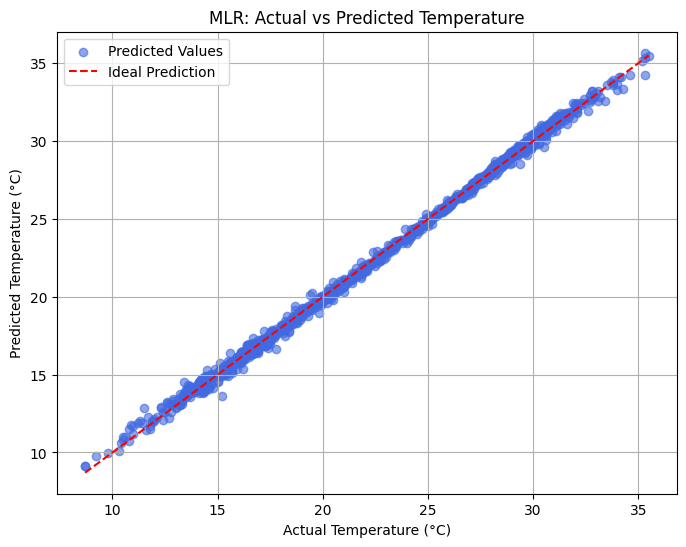

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue', label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('MLR: Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.show()

# QML

In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip uninstall -y qiskit qiskit-machine-learning
!pip install qiskit==0.43.1 qiskit-machine-learning==0.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 121.2 MB/s eta 0:00:00
Found existing installation: qiskit 2.1.1
Uninstalling qiskit-2.1.1:
  Successfully uninstalled qiskit-2.1.1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install qiskit qiskit-machine-learning


In [ ]:
!pip install qiskit qiskit-machine-learning --upgrade


  Using cached qiskit-2.1.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: symengine
    Found existing installation: symengine 0.9.2
    Uninstalling symengine-0.9.2:
      Successfully uninstalled symengine-0.9.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: qiskit
    Found existing installation: qiskit 0.43.1
    Uninstalling qiskit-0.43.1:
      Successfully uninstalled qiskit-0.43.1
  Attempting uninstall: qiskit-m

In [ ]:
!pip uninstall -y qiskit qiskit-terra qiskit-aer qiskit-ibmq-provider
!pip install qiskit --quiet


Found existing installation: qiskit 1.4.3
Uninstalling qiskit-1.4.3:
  Successfully uninstalled qiskit-1.4.3
Found existing installation: qiskit-terra 0.24.1
Uninstalling qiskit-terra-0.24.1:
  Successfully uninstalled qiskit-terra-0.24.1
Found existing installation: qiskit-aer 0.12.0
Uninstalling qiskit-aer-0.12.0:
  Successfully uninstalled qiskit-aer-0.12.0
Found existing installation: qiskit-ibmq-provider 0.20.2
Uninstalling qiskit-ibmq-provider-0.20.2:
  Successfully uninstalled qiskit-ibmq-provider-0.20.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qiskit-machine-learning 0.8.3 requires qiskit<2.0,>=1.0, but you have qiskit 2.1.1 which is incompatible.


In [ ]:
# Uninstall conflicting packages
!pip uninstall -y qiskit qiskit-terra qiskit-aer qiskit-ibmq-provider qiskit-machine-learning

# Install Qiskit 1.x and machine learning add-ons
!pip install qiskit==1.0.2 qiskit-machine-learning==0.7.1


Found existing installation: qiskit 1.1.0
Uninstalling qiskit-1.1.0:
  Successfully uninstalled qiskit-1.1.0
Found existing installation: qiskit-terra 0.45.1
Uninstalling qiskit-terra-0.45.1:
  Successfully uninstalled qiskit-terra-0.45.1
Found existing installation: qiskit-machine-learning 0.7.0
Uninstalling qiskit-machine-learning-0.7.0:
  Successfully uninstalled qiskit-machine-learning-0.7.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 10.4 MB/s eta 0:00:00


In [ ]:
# --- User Input and Prediction ---
def predict_temperature(apparent_temp, evapotranspiration):
    # Create input array
    input_data = np.array([[apparent_temp, evapotranspiration]])

    # Scale input using the fitted scaler
    input_scaled = scaler_X.transform(input_data)

    # Convert to tensor
    input_tensor = torch.tensor(input_scaled, dtype=torch.float32)

    # Predict
    qnn_model.eval()
    with torch.no_grad():
        pred_scaled = qnn_model(input_tensor).numpy()
        pred = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1)).flatten()[0]

    return pred


apparent_temp = float(input("Enter apparent temperature mean (°C)( 3.9 ___ 36 ): "))
evapotranspiration = float(input("Enter et0_fao_evapotranspiration (mm)(1.1 ___ 12.7): "))
predicted_temp = predict_temperature(apparent_temp, evapotranspiration)
print(f"\n🌡️ Predicted Mean Temperature: {predicted_temp:.2f} °C")


Enter apparent temperature mean (°C)( 3.9 ___ 36 ): 30
Enter et0_fao_evapotranspiration (mm)(1.1 ___ 12.7): 2

🌡️ Predicted Mean Temperature: 24.68 °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
!pip install qiskit qiskit-machine-learning --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 9.9 MB/s eta 0:00:00


In [3]:
# --- Install Required Packages ---
!pip install qiskit qiskit-machine-learning qiskit-ibm-runtime


In [5]:
!pip install --upgrade --force-reinstall torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

/tmp/ipython-input-455563770.py:52: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()  # Using local simulator
/tmp/ipython-input-455563770.py:54: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(


Epoch 30/300, Loss: 0.0044, LR: 0.050000
Epoch 60/300, Loss: 0.0040, LR: 0.040000
Epoch 90/300, Loss: 0.0039, LR: 0.040000
Epoch 120/300, Loss: 0.0039, LR: 0.032000
Epoch 150/300, Loss: 0.0038, LR: 0.025600
Epoch 180/300, Loss: 0.0038, LR: 0.025600
Epoch 210/300, Loss: 0.0038, LR: 0.020480
Epoch 240/300, Loss: 0.0038, LR: 0.020480
Epoch 270/300, Loss: 0.0038, LR: 0.016384
Epoch 300/300, Loss: 0.0038, LR: 0.013107

🚀 QNN Model Performance:
📉 MSE: 6.2681
📏 RMSE: 2.5036
📈 R²: 0.8348


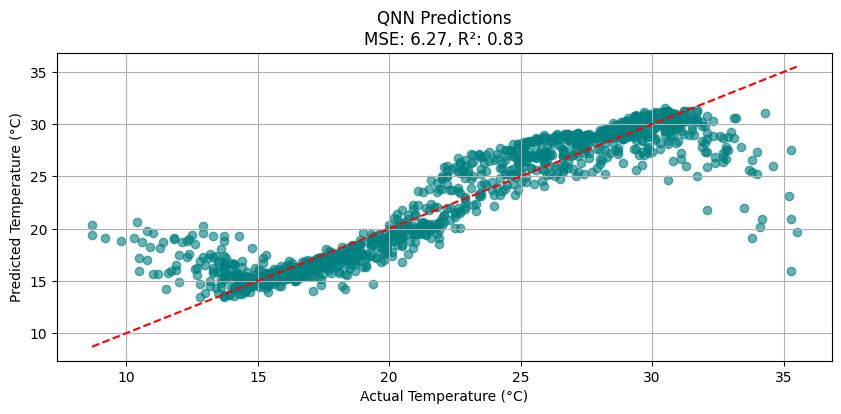

In [1]:

# --- Imports ---
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from qiskit.circuit.library import ZZFeatureMap, EfficientSU2
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit.primitives import Estimator  # Using local simulator instead of runtime
from torch.optim.lr_scheduler import StepLR

# --- Load Data ---
df = pd.read_csv("Cairo-Weather.csv")
top_features = ['apparent_temperature_mean (°C)', 'et0_fao_evapotranspiration (mm)']
X = df[top_features]
y = df['temperature_2m_mean (°C)']

# --- Optimized Preprocessing ---
scaler_X = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# 80/20 split for better performance
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Optimal sample size
sample_indices = np.random.choice(len(X_train), size=250, replace=False)
X_train_small = X_train[sample_indices]
y_train_small = y_train[sample_indices]

# Tensor conversion
X_train_tensor = torch.tensor(X_train_small, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_small, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# --- Optimized Quantum Circuit ---
num_qubits = X.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=1)  # Balanced depth
ansatz = EfficientSU2(num_qubits, reps=1, entanglement='circular')  # Better entanglement
quantum_circuit = feature_map.compose(ansatz)

# --- QNN Setup with Local Simulator ---
estimator = Estimator()  # Using local simulator

qnn = EstimatorQNN(
    circuit=quantum_circuit,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    estimator=estimator,
    input_gradients=True
)

# --- Efficient Model Architecture ---
class QNNRegressor(nn.Module):
    def __init__(self, qnn_model):
        super().__init__()
        self.qnn = qnn_model
        self.post_processor = nn.Linear(1, 1)  # Lightweight post-processing

    def forward(self, x):
        x = self.qnn(x)
        return self.post_processor(x.unsqueeze(-1)).squeeze()

model = TorchConnector(qnn)
qnn_model = QNNRegressor(model).float()

# --- Optimized Training ---
optimizer = torch.optim.AdamW(qnn_model.parameters(), lr=0.05)  # AdamW for better convergence
scheduler = StepLR(optimizer, step_size=50, gamma=0.8)  # Gentle LR reduction
loss_fn = nn.HuberLoss()  # More robust than MSE
epochs = 300
losses = []

best_loss = float('inf')
patience = 20
counter = 0

for epoch in range(epochs):
    qnn_model.train()
    optimizer.zero_grad()

    outputs = qnn_model(X_train_tensor)
    loss = loss_fn(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()
    scheduler.step()

    losses.append(loss.item())

    # Early Stopping
    if loss.item() < best_loss:
        best_loss = loss.item()
        counter = 0
        torch.save(qnn_model.state_dict(), 'best_model.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    if (epoch + 1) % 30 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, LR: {scheduler.get_last_lr()[0]:.6f}")

# Load best model
qnn_model.load_state_dict(torch.load('best_model.pth'))

# --- Evaluation ---
qnn_model.eval()
with torch.no_grad():
    predictions = qnn_model(X_test_tensor).numpy()
    predictions_rescaled = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
    y_test_rescaled = scaler_y.inverse_transform(y_test_tensor.reshape(-1, 1)).flatten()

    mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
    r2 = r2_score(y_test_rescaled, predictions_rescaled)
    rmse = np.sqrt(mse)

print(f"\n🚀 QNN Model Performance:")
print(f"📉 MSE: {mse:.4f}")
print(f"📏 RMSE: {rmse:.4f}")
print(f"📈 R²: {r2:.4f}")

# --- Visualization ---
plt.figure(figsize=(10, 4))
plt.scatter(y_test_rescaled, predictions_rescaled, alpha=0.6, c='teal')
plt.plot([min(y_test_rescaled), max(y_test_rescaled)],
         [min(y_test_rescaled), max(y_test_rescaled)], 'r--')
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title(f"QNN Predictions\nMSE: {mse:.2f}, R²: {r2:.2f}")
plt.grid(True)
plt.show()

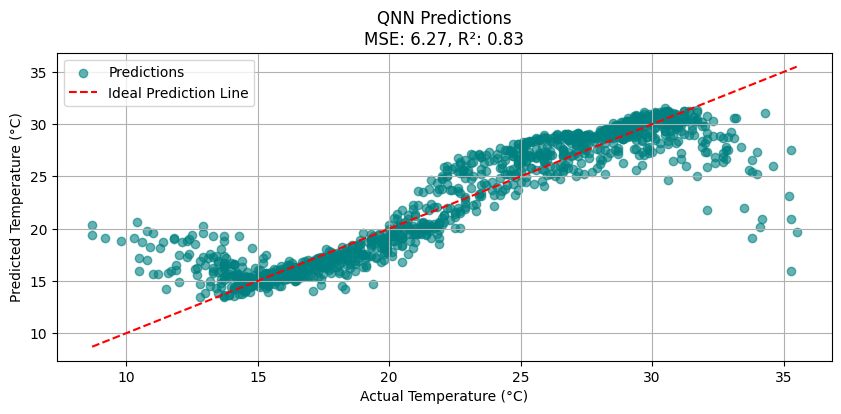

In [2]:
# --- Visualization ---
plt.figure(figsize=(10, 4))
plt.scatter(y_test_rescaled, predictions_rescaled, alpha=0.6, c='teal', label='Predictions')
plt.plot(
    [min(y_test_rescaled), max(y_test_rescaled)],
    [min(y_test_rescaled), max(y_test_rescaled)],
    'r--',
    label='Ideal Prediction Line'
)
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title(f"QNN Predictions\nMSE: {mse:.2f}, R²: {r2:.2f}")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
def predict_temperature(apparent_temp, evapotranspiration, top_n=5):
    # Create input array
    input_data = np.array([[apparent_temp, evapotranspiration]])

    # Scale input using the fitted scaler
    input_scaled = scaler_X.transform(input_data)

    # Convert to tensor
    input_tensor = torch.tensor(input_scaled, dtype=torch.float32)

    # Predict
    qnn_model.eval()
    with torch.no_grad():
        pred_scaled = qnn_model(input_tensor).numpy()
        pred = scaler_y.inverse_transform(pred_scaled.reshape(-1, 1)).flatten()[0]

    print(f"\n🌡️ Predicted Mean Temperature: {pred:.2f} °C")

    # --- Find Closest Real Data Points ---
    input_point = np.array([apparent_temp, evapotranspiration])
    distances = np.linalg.norm(X.values - input_point, axis=1)
    df['distance'] = distances

    closest_points = df.sort_values('distance').head(top_n)

    print(f"\n🔍 Closest {top_n} Real Data Points from Dataset:")
    for idx, row in closest_points.iterrows():
        print(f"→ Apparent Temp: {row['apparent_temperature_mean (°C)']:.2f} °C, "
              f"Evapotranspiration: {row['et0_fao_evapotranspiration (mm)']:.2f} mm, "
              f"Real Temp: {row['temperature_2m_mean (°C)']:.2f} °C")

    return pred



apparent_temp = float(input("Enter apparent temperature mean (°C)( 3.9 ___ 36 ): "))
evapotranspiration = float(input("Enter et0_fao_evapotranspiration (mm)(1.1 ___ 12.7): "))
predicted_temp = predict_temperature(apparent_temp, evapotranspiration)
print(f"\n🌡️ Predicted Mean Temperature: {predicted_temp:.2f} °C")


Enter apparent temperature mean (°C)( 3.9 ___ 36 ): 18
Enter et0_fao_evapotranspiration (mm)(1.1 ___ 12.7): 10

🌡️ Predicted Mean Temperature: 23.63 °C

🔍 Closest 5 Real Data Points from Dataset:
→ Apparent Temp: 18.20 °C, Evapotranspiration: 8.58 mm, Real Temp: 22.80 °C
→ Apparent Temp: 18.60 °C, Evapotranspiration: 8.55 mm, Real Temp: 23.90 °C
→ Apparent Temp: 18.50 °C, Evapotranspiration: 8.44 mm, Real Temp: 22.80 °C
→ Apparent Temp: 19.70 °C, Evapotranspiration: 9.82 mm, Real Temp: 24.80 °C
→ Apparent Temp: 19.80 °C, Evapotranspiration: 9.56 mm, Real Temp: 24.80 °C

🌡️ Predicted Mean Temperature: 23.63 °C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
